In [36]:
from keras.datasets import imdb
import numpy as np
from keras import layers
from keras import models
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_set, test_data) = imdb.load_data(num_words = 10000)

In [3]:
type(train_data)

numpy.ndarray

In [10]:
len(test_set[0])



68

In [4]:
#one hot encoding
def vectorize_sequence(sequences, dimensions = 10000):
    result = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result


In [6]:
x_train = vectorize_sequence(train_data)

In [7]:
x_test = vectorize_sequence(test_set)

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_data).astype('float32')

In [22]:
neural_net = models.Sequential()
neural_net.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))

In [23]:
neural_net.add(layers.Dense(16,activation = 'relu'))
neural_net.add(layers.Dense(1, activation = 'sigmoid'))

In [33]:
neural_net.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics= ['acc'])

In [34]:
#make a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[ :10000]
partial_y_train = y_train[10000:]  

In [35]:
history = neural_net.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.4944 - acc: 0.7841 - val_loss: 0.3620 - val_acc: 0.8737
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2869 - acc: 0.9061 - val_loss: 0.2952 - val_acc: 0.8874
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.2120 - acc: 0.9289 - val_loss: 0.2903 - val_acc: 0.8832
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1721 - acc: 0.9414 - val_loss: 0.2772 - val_acc: 0.8881
Epoch 5/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1363 - acc: 0.9579 - val_loss: 0.2841 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1151 - acc: 0.9643 - val_loss: 0.3036 - val_acc: 0.8825
Epoch 7/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.0929 - acc: 0.9725 - val_loss: 0.3234 - 

In [38]:
history_dict = history.history

In [39]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [43]:
epochs = range(1, len(history_dict['acc']) + 1)
loss_values = history_dict['loss']
val_set_loss_values = history_dict['val_loss']

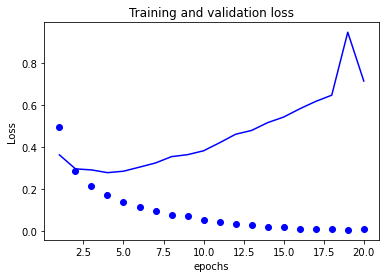

In [44]:
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_set_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [45]:
result = neural_net.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 149us/step


In [46]:
result

[0.7775053268790245, 0.8509600162506104]